1-D heat equation 

In [2]:
# because they will help us a lot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


In [7]:
rod_length = 2
max_iter_time = 1000

alpha = 0.1
delta_x = 0.008

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, rod_length, rod_length))

# Initial condition everywhere inside the grid
u_initial = 0.0

# Boundary conditions (fixed temperature)
# u_top = 100.0
u_left = 0.0
u_bottom = 2.0


# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
# u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
# u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, rod_length-1, 1):
        for i in range(1, rod_length-1, delta_x):
            for j in range(1, rod_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
    return u

In [8]:
def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
  
    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
  
    return plt

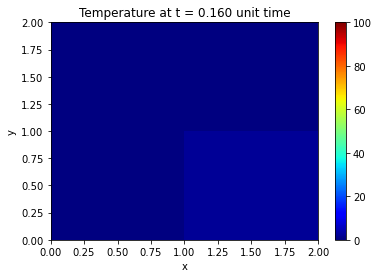

In [9]:
def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")